In [34]:
!pip install sklearn xgboost
# save a copy before you run (keep notebook original result)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, RepeatedKFold

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
data = pd.read_csv('Model Test Data.csv')

In [4]:
data.head()

y         var_1        var_2        var_3     var_4         var_5  \
0  58.891377   5285.076955  8102.610429 -142802.4627  0.731818  61045.686450   
1  57.641838   2094.137183  7432.119245 -147434.0657  2.527586  48485.220290   
2  53.746536   5830.245294  6613.941822 -129496.5961  2.625691  36301.747910   
3  36.168986  13039.246420  5270.829420 -439972.8126  0.844833  -5909.877785   
4  32.669772   4611.755026  3456.822275 -138594.7123  4.058533  37602.705370   

         var_6        var_7        var_8        var_9  var_10  
0  183502.7911  2418498.392  27880.60083  360626.7592       4  
1  232809.7287  1779351.332  32153.75776  382670.3624       5  
2  214837.0432  2072100.771  30642.70182  370120.6062       2  
3  173613.1204  1899841.158  41311.52728  329891.8986       4  
4  228498.4096  1925463.972  27522.27266  473752.7977       3

In [5]:
data.describe()

y         var_1         var_2          var_3         var_4  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean      12.190351   8445.963010   3450.252510  168505.815510      1.610510   
std       16.020137   3540.407793   2544.552718  154606.758685      0.799212   
min      -20.486397  -5583.153749  -6338.250221 -439972.812600     -1.328607   
25%        0.342919   6012.666381   1689.792306   64840.482335      1.070263   
50%       10.881019   8463.373285   3430.595021  167029.781400      1.598712   
75%       23.047831  10864.843605   5165.408836  272343.174250      2.146489   
max       94.749833  23299.976630  12288.699000  857156.728100      4.639956   

               var_5          var_6         var_7         var_8  \
count   10000.000000   10000.000000  1.000000e+04  10000.000000   
mean    73390.402240   85873.402570  1.150636e+06  22190.066240   
std     42488.751840   71600.020020  8.840513e+05   9835.270071   
min    -77050.448580 -162312.422300 -2.692945e+06 -12674.425590   
25%     44707.280773   37958.405845  5.353268e+05  15593.819880   
50%     73543.761555   86582.980525  1.149984e+06  22091.102400   
75%    102189.829900  133951.621325  1.742196e+06  28924.445840   
max    242913.447400  357758.526300  4.315470e+06  58807.189120   

               var_9        var_10  
count   10000.000000  10000.000000  
mean   153862.395490      3.032500  
std     84665.459925      1.410901  
min   -135125.465700      1.000000  
25%     96818.711418      2.000000  
50%    154089.232450      3.000000  
75%    211875.685575      4.000000  
max    473752.797700      5.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10000 non-null  float64
 1   var_1   10000 non-null  float64
 2   var_2   10000 non-null  float64
 3   var_3   10000 non-null  float64
 4   var_4   10000 non-null  float64
 5   var_5   10000 non-null  float64
 6   var_6   10000 non-null  float64
 7   var_7   10000 non-null  float64
 8   var_8   10000 non-null  float64
 9   var_9   10000 non-null  float64
 10  var_10  10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


# Exploratary Data Analysis

<AxesSubplot: >

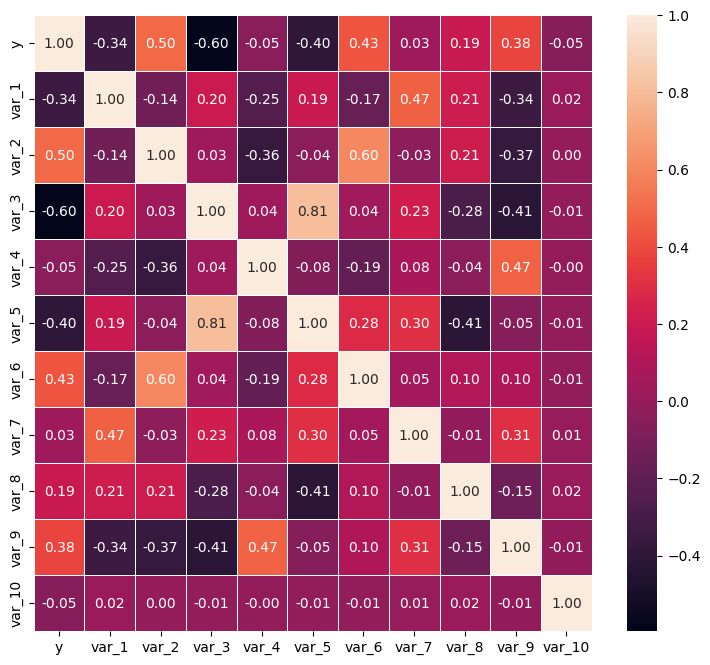

In [7]:
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f', ax=ax)

array([[<AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'var_1'}>,
        <AxesSubplot: title={'center': 'var_2'}>],
       [<AxesSubplot: title={'center': 'var_3'}>,
        <AxesSubplot: title={'center': 'var_4'}>,
        <AxesSubplot: title={'center': 'var_5'}>],
       [<AxesSubplot: title={'center': 'var_6'}>,
        <AxesSubplot: title={'center': 'var_7'}>,
        <AxesSubplot: title={'center': 'var_8'}>],
       [<AxesSubplot: title={'center': 'var_9'}>,
        <AxesSubplot: title={'center': 'var_10'}>, <AxesSubplot: >]],
      dtype=object)

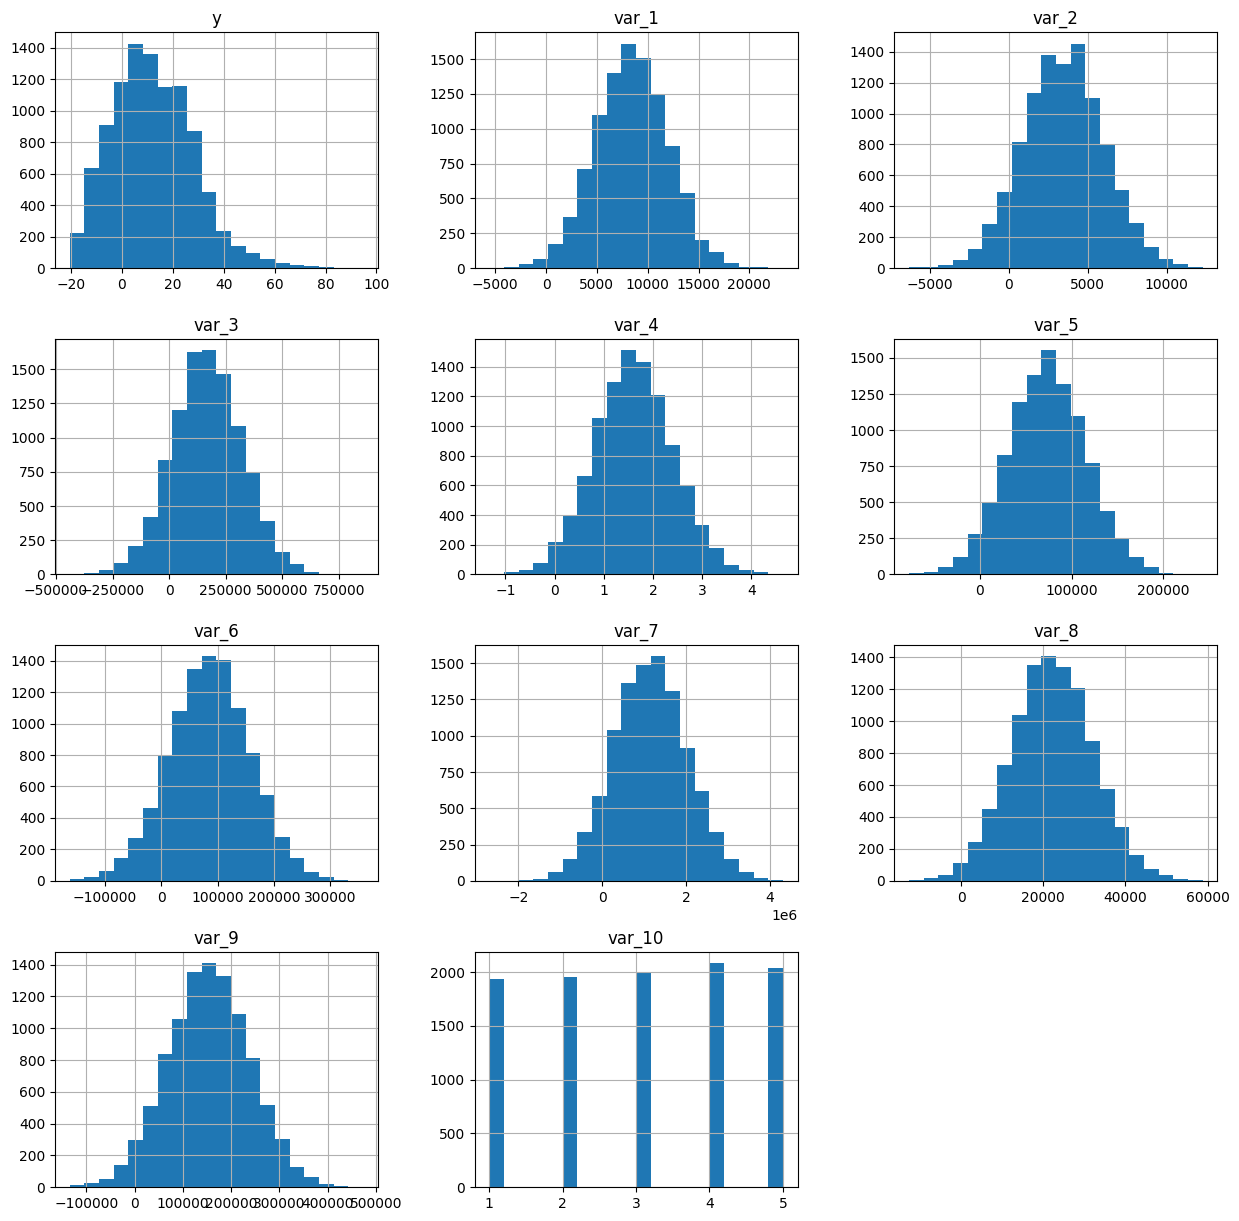

In [8]:
data.hist(bins=20, figsize=(15, 15))


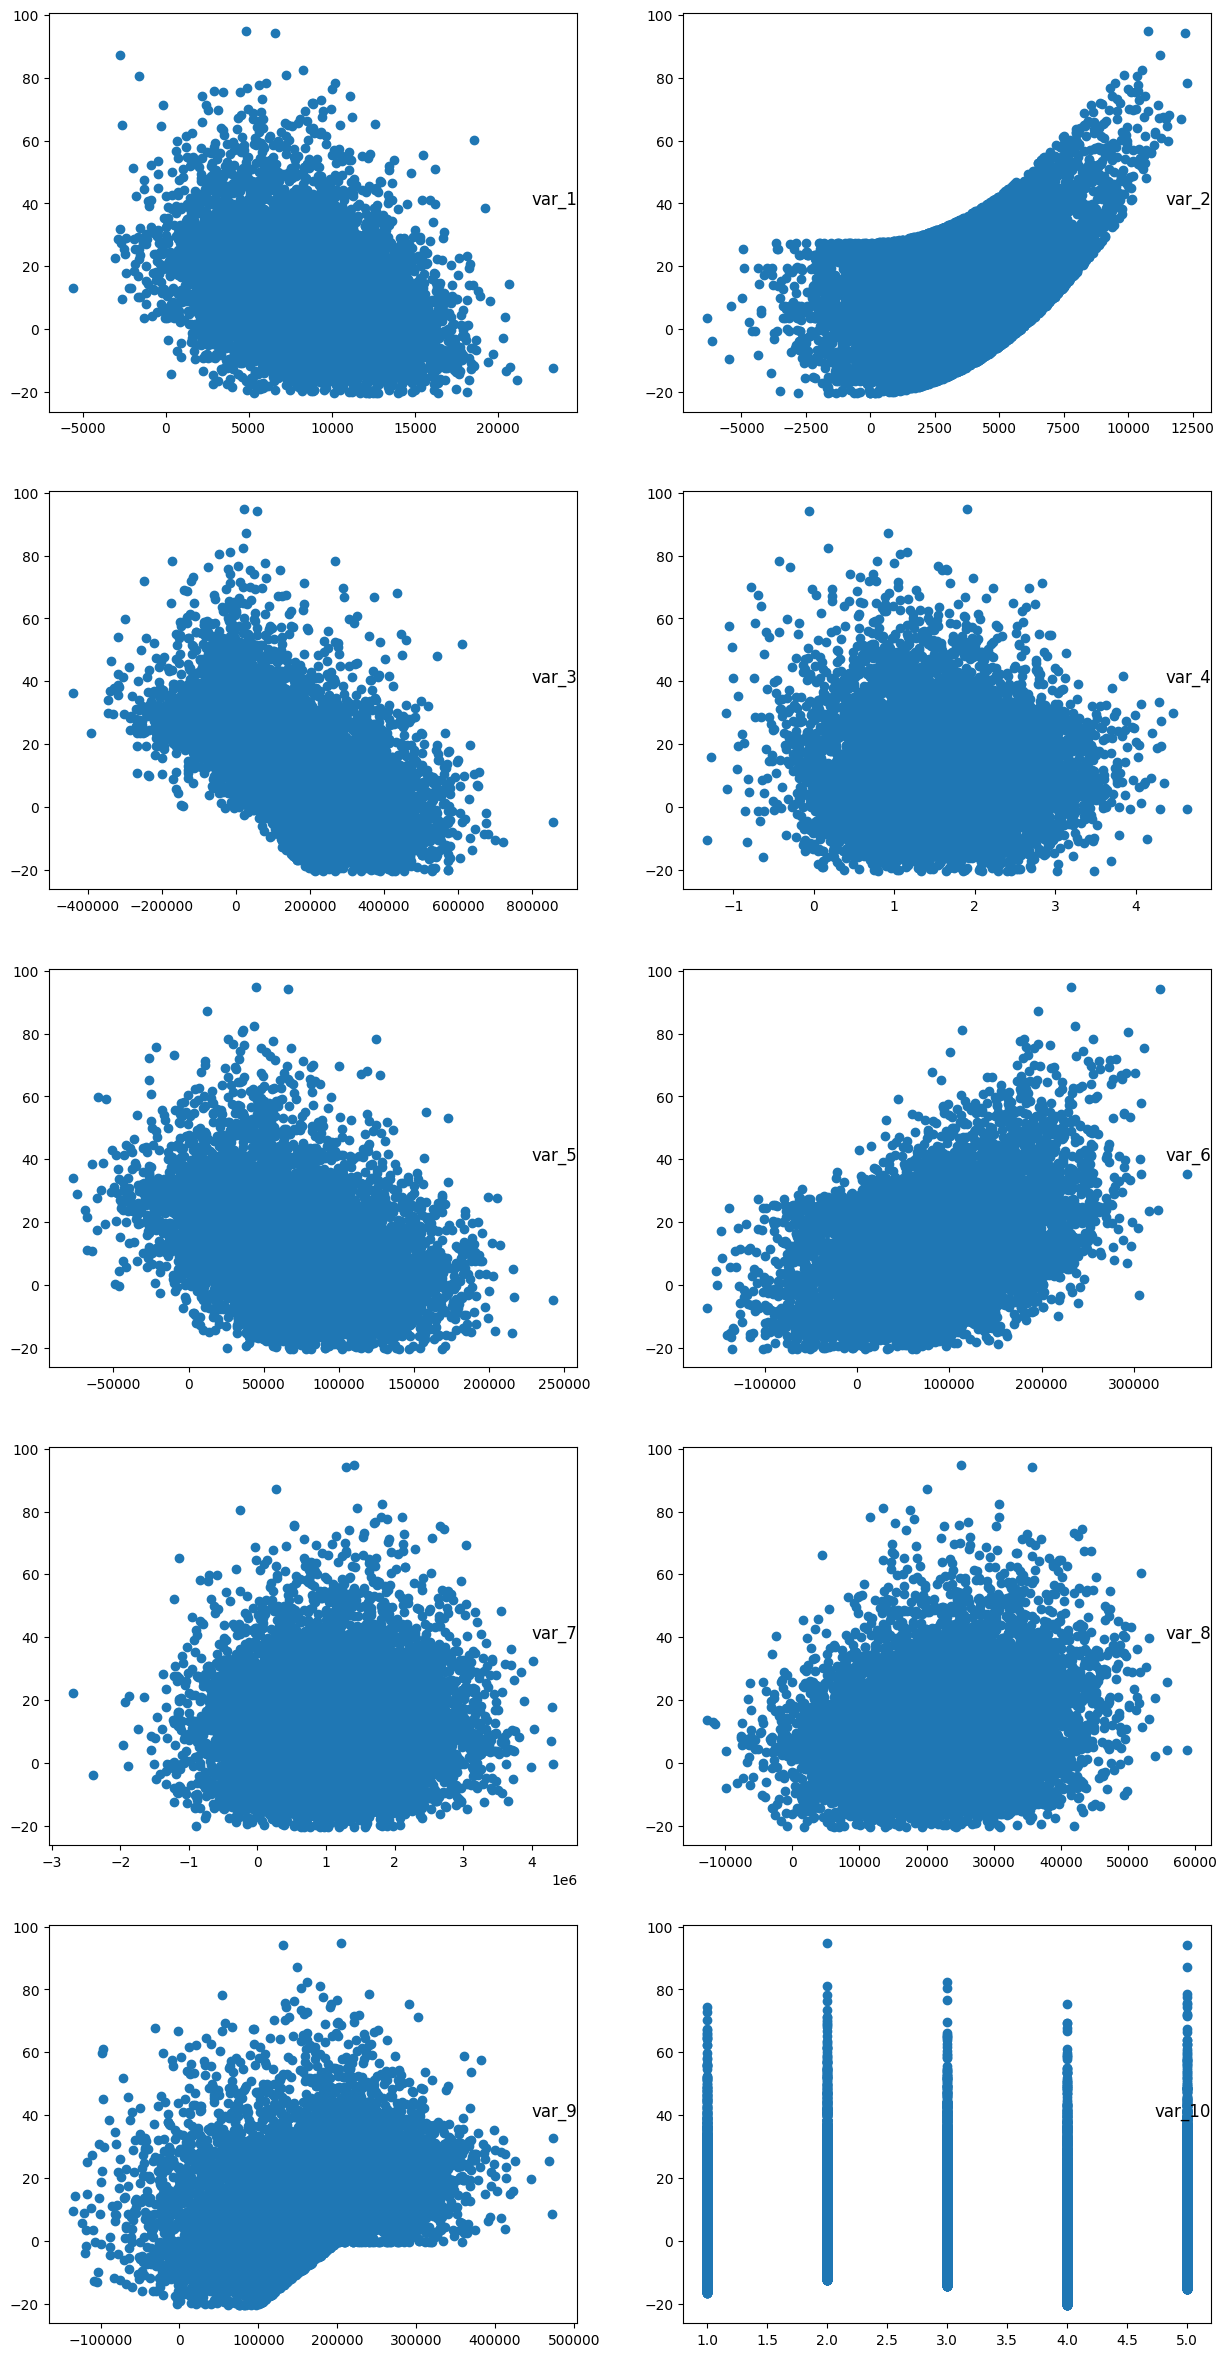

In [9]:
i = 1
plt.figure(figsize=(15, 30))
for col in data.columns[1:]:
    plt.subplot(5, 2, i)
    plt.scatter(data['var_'+str(i)], data['y'])
    plt.title(col, y=0.5, loc='right')
#     plt.subtitle('y vs. var_' + str(i))
    i += 1
plt.show()

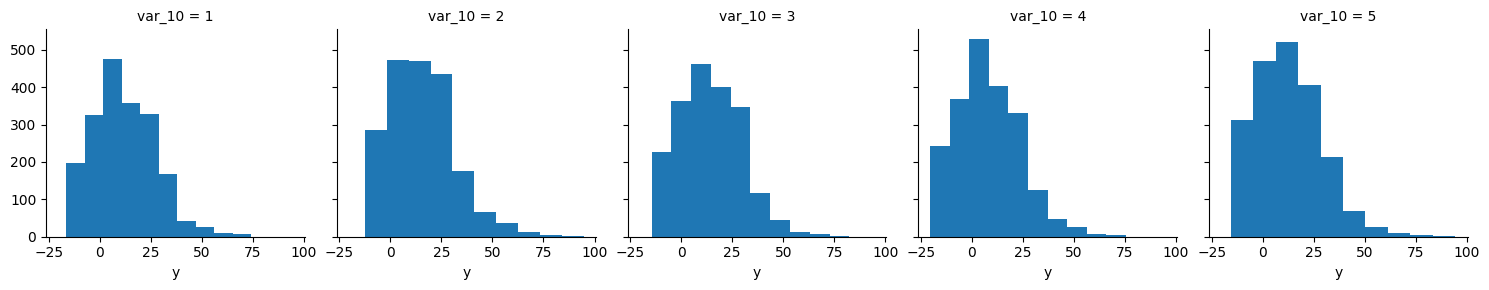

In [10]:
g = sns.FacetGrid(data, col='var_10')
g.map(plt.hist, 'y', bins=10)

In [11]:
data[['y', 'var_10']].groupby('var_10', as_index=False).mean().sort_values(by='var_10', ascending=False)

var_10          y
4       5  12.635403
3       4   7.561725
2       3  14.070371
1       2  15.257419
0       1  11.678159

# Model

In [12]:
def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)    

## Baseline

In [13]:
X, y = data.drop(columns=['y']), data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'GBR': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'ExtraTreeRegressor': ExtraTreesRegressor(),
    'LASSO': Lasso(),
    'ElasticNet': ElasticNet(), 
    'KNN': KNeighborsRegressor(),
    'CART': DecisionTreeRegressor(),
    'SVR': SVR()
}

In [15]:
for model_name, regressor in models.items():
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(regressor, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    print('=' * 40)
    print("%s: %f (%f)" % (model_name, -cv_results.mean(), cv_results.std()))
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print("test set rmse %.4f" % rmse(y_test, y_pred))
    print("R2: %.4f" % r2_score(y_test, y_pred))

Linear Regression: 7.674666 (0.196865)
test set rmse 7.5035
R2: 0.7771
Random Forest: 1.889352 (0.059728)
test set rmse 1.8176
R2: 0.9869
GBR: 1.033207 (0.076581)
test set rmse 1.0407
R2: 0.9957
XGBoost: 1.207888 (0.065081)
test set rmse 1.1061
R2: 0.9952
AdaBoost: 5.151055 (0.096831)
test set rmse 5.4542
R2: 0.8822
ExtraTreeRegressor: 1.850940 (0.051521)
test set rmse 1.7783
R2: 0.9875
LASSO: 7.706731 (0.209390)
test set rmse 7.5226
R2: 0.7760
ElasticNet: 7.687040 (0.204839)
test set rmse 7.5078
R2: 0.7769
KNN: 9.828523 (0.104630)
test set rmse 9.5729
R2: 0.6373
CART: 2.900419 (0.076915)
test set rmse 3.0248
R2: 0.9638
SVR: 10.972868 (0.174121)
test set rmse 10.4874
R2: 0.5647


In [16]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Prediction vs True value')

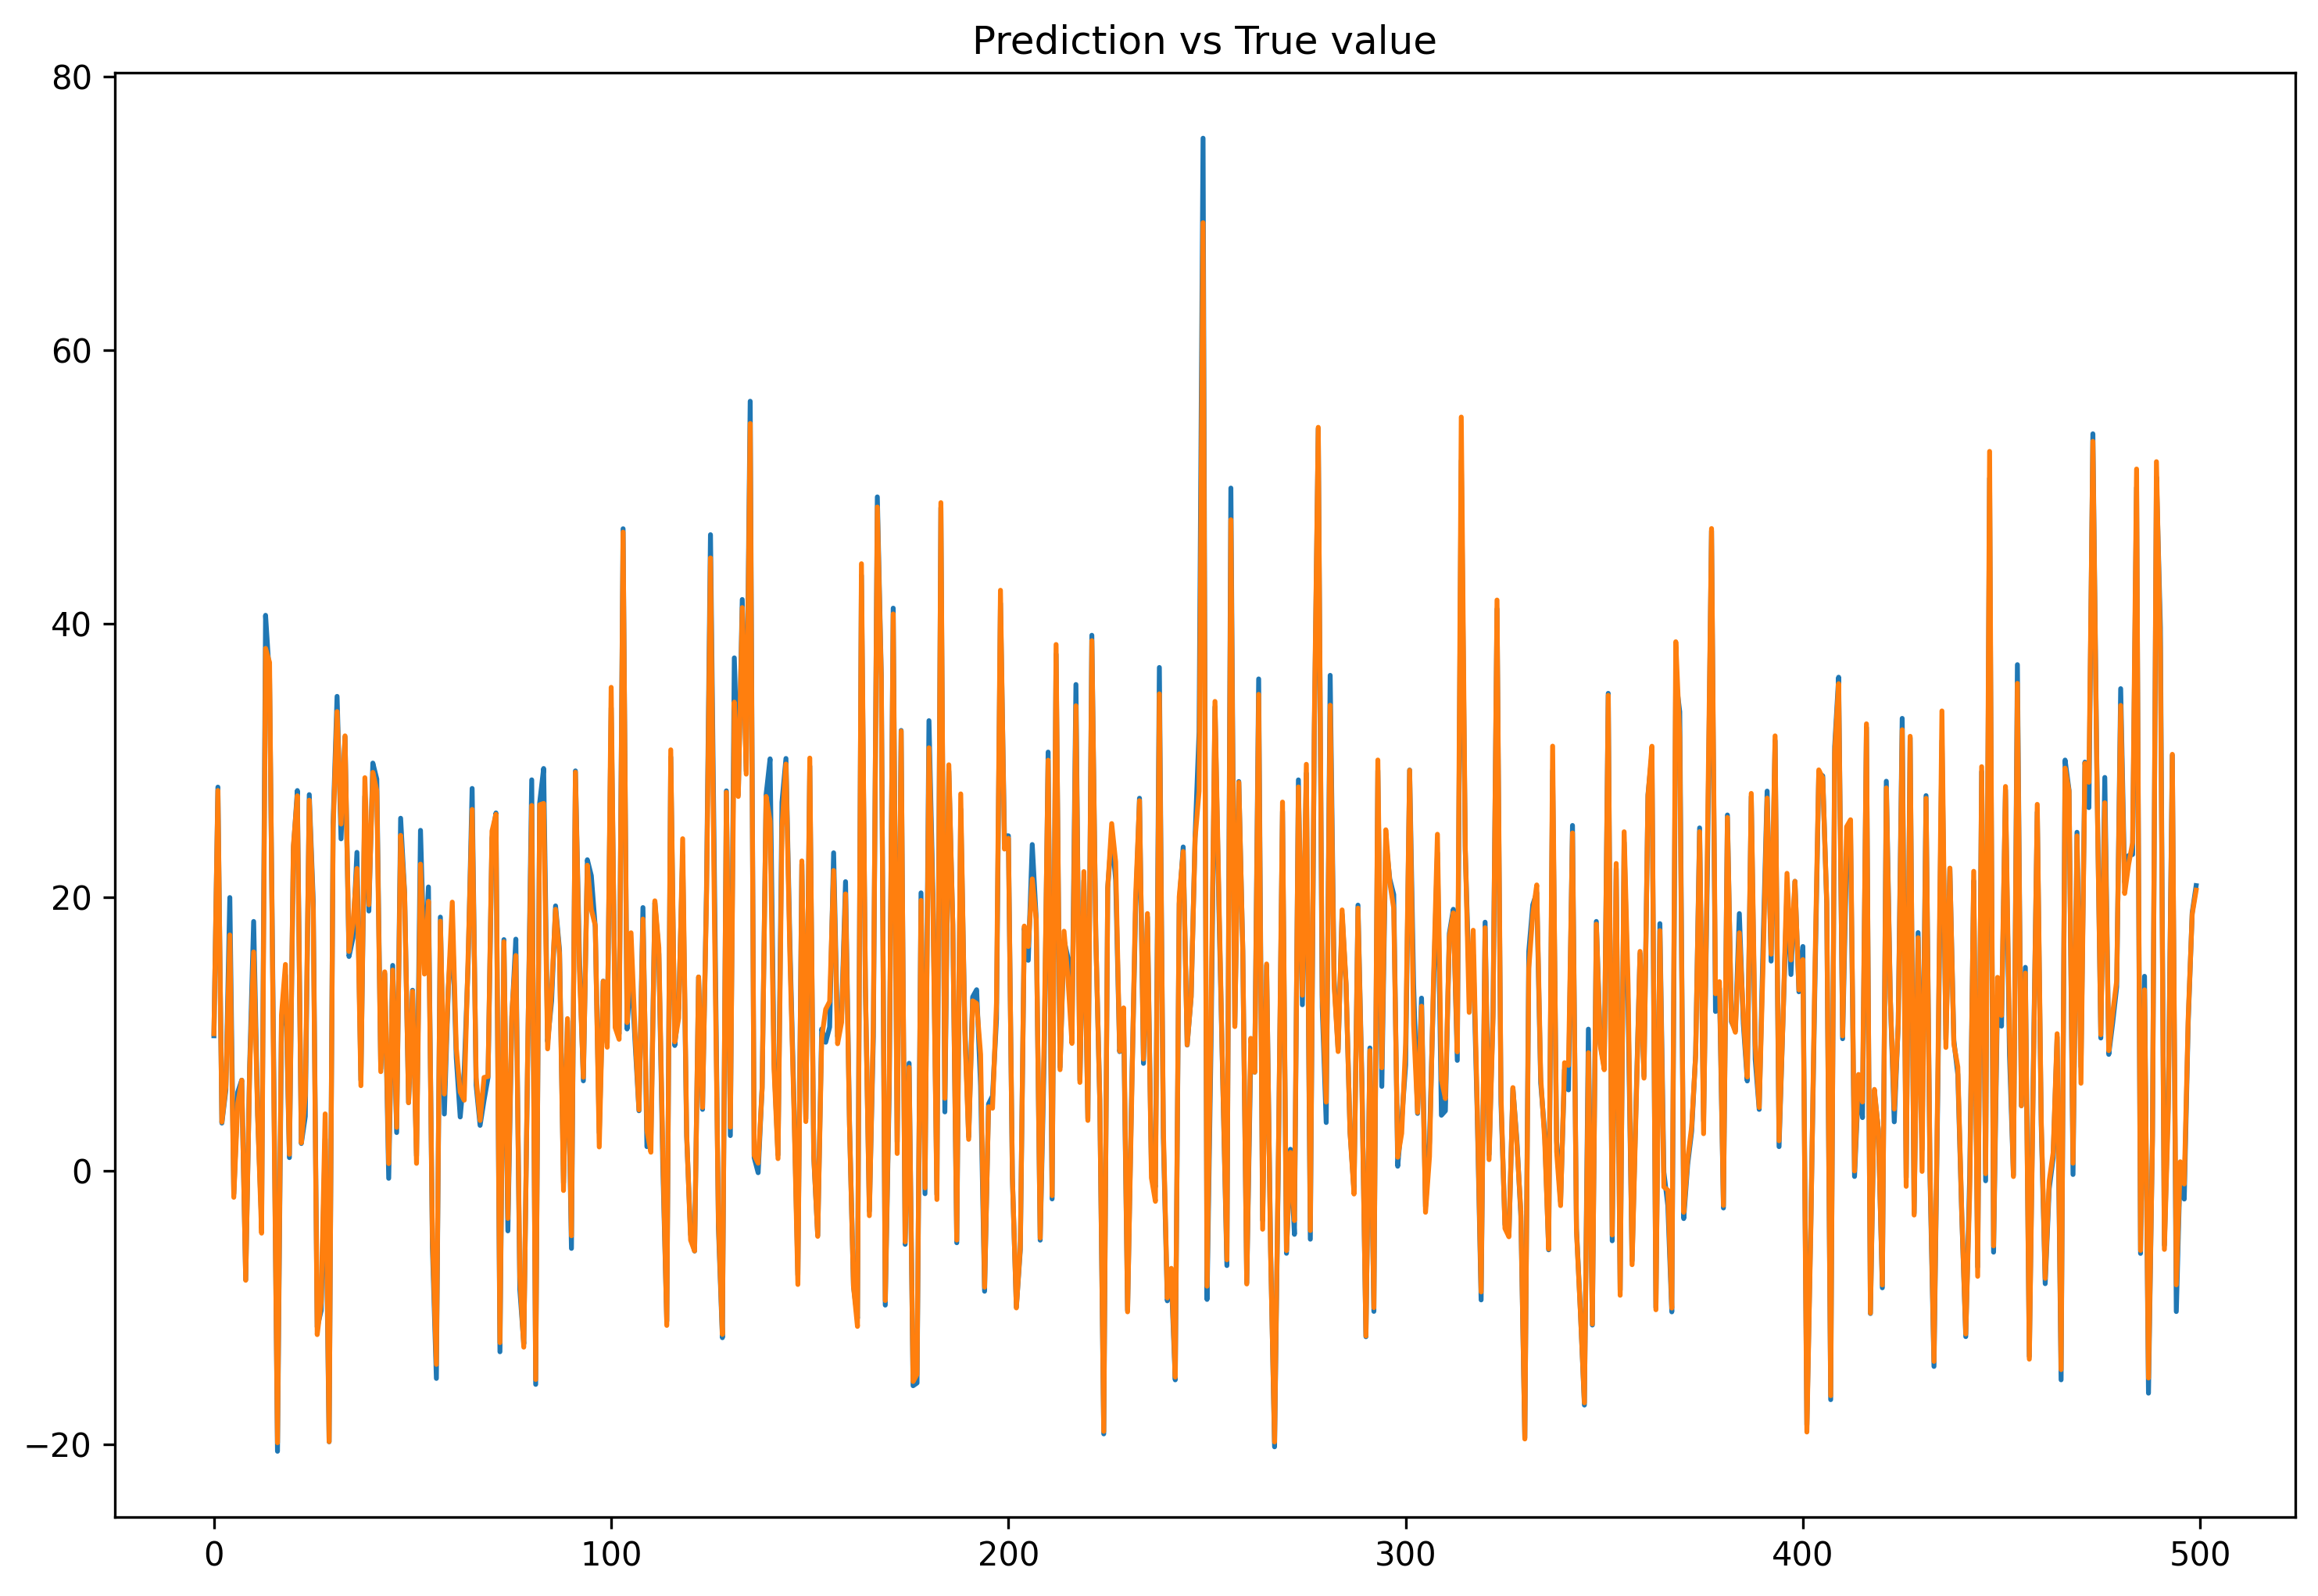

In [17]:
size = range(1500, 2000)
plt.figure(figsize=(12,8), dpi=300)
plt.plot(y_test.values[size])
plt.plot(y_pred[size])
plt.title("Prediction vs True value")

## Improvement

### Encoding

In [18]:
data_encoding = data.copy()

In [19]:
data_encoding['var_10'] = data_encoding['var_10'].astype(str)
data_encoding = pd.get_dummies(data_encoding)

In [20]:
X, y = data_encoding.drop(columns=['y']), data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
models = {
    'GBR': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

In [22]:
for model_name, regressor in models.items():
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(regressor, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    print('=' * 40)
    print("%s: %f (%f)" % (model_name, -cv_results.mean(), cv_results.std()))
    print("R2: %.4f" % r2_score(y_test, y_pred))
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print("test set rmse %.4f" % rmse(y_test, y_pred))

GBR: 1.017919 (0.074427)
R2: 0.9957
test set rmse 1.0316
XGBoost: 1.154789 (0.042713)
R2: 0.9958
test set rmse 1.1094


In [23]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Prediction vs True value')

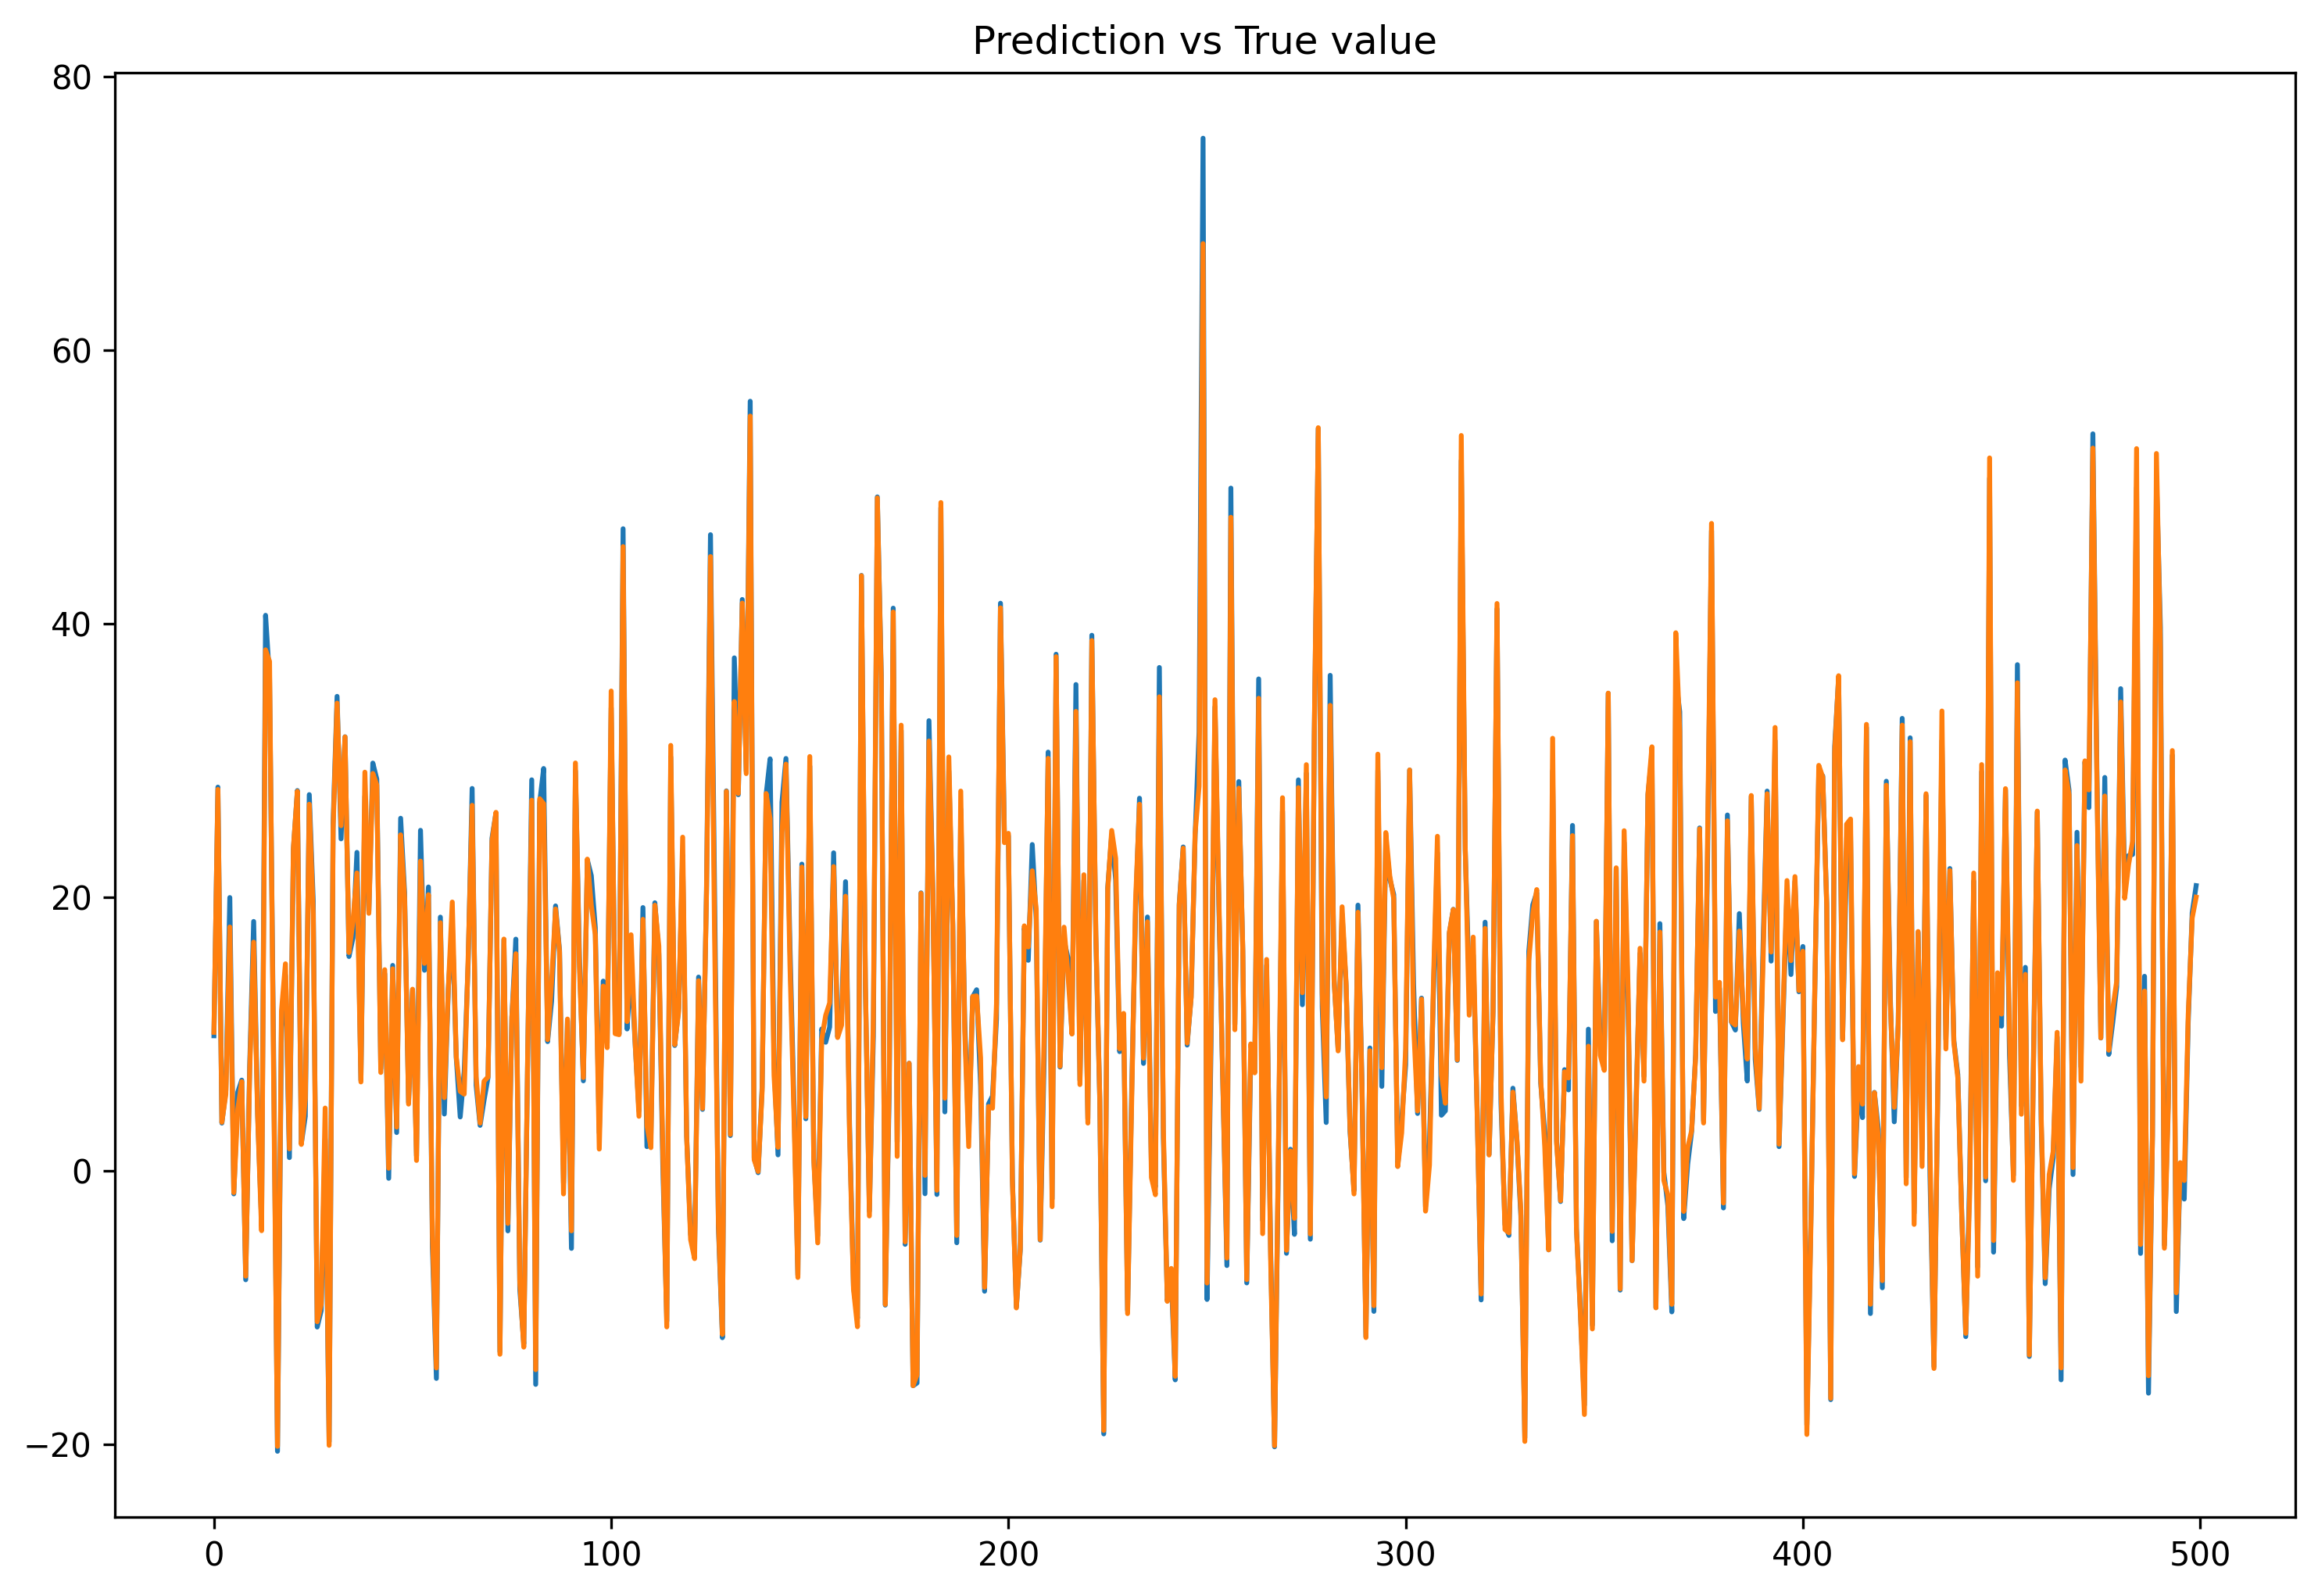

In [24]:
size = range(1500,2000)
plt.figure(figsize=(12,8), dpi=300)
plt.plot(y_test.values[size])
plt.plot(y_pred[size])
plt.title("Prediction vs True value")

### Polynomial feature added

In [25]:
data_poly = data.copy()

In [26]:
data_poly['var_2_quad'] = data_poly['var_2'] ** 2

In [27]:
X, y = data_poly.drop(columns=['y']), data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
for model_name, regressor in models.items():
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(regressor, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    print('=' * 40)
    print("%s: %f (%f)" % (model_name, -cv_results.mean(), cv_results.std()))
    print("R2: %.4f" % r2_score(y_test, y_pred))
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print("test set rmse %.4f" % rmse(y_test, y_pred))

GBR: 1.033894 (0.076639)
R2: 0.9958
test set rmse 1.0410
XGBoost: 1.207796 (0.065327)
R2: 0.9957
test set rmse 1.1330


### Drop features

In [29]:
result = pd.DataFrame(columns=['drop feature', 'RMSE train', 'RMSE test'])

In [30]:
for var in data.columns[1:]:
    data_feature = data.drop(columns=[var])
    X, y = data_feature.drop(columns=['y']), data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(GradientBoostingRegressor(), X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    print('=' * 40)
    print("Drop feature " + var)
    print("GB Regressor: %f (%f)" % (-cv_results.mean(), cv_results.std()))
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result.loc[var] = [var, -cv_results.mean(), rmse(y_test, y_pred)]

Drop feature var_1
GB Regressor: 1.035508 (0.080598)
Drop feature var_2
GB Regressor: 7.363911 (0.200819)
Drop feature var_3
GB Regressor: 3.713756 (0.054182)
Drop feature var_4
GB Regressor: 1.033392 (0.076323)
Drop feature var_5
GB Regressor: 1.034579 (0.079682)
Drop feature var_6
GB Regressor: 1.006414 (0.052609)
Drop feature var_7
GB Regressor: 1.033331 (0.076555)
Drop feature var_8
GB Regressor: 1.032192 (0.076769)
Drop feature var_9
GB Regressor: 4.409379 (0.078891)
Drop feature var_10
GB Regressor: 2.871816 (0.034732)


In [31]:
result.sort_values(by='RMSE test')

drop feature  RMSE train  RMSE test
var_8         var_8    1.032192   1.039558
var_7         var_7    1.033331   1.040668
var_1         var_1    1.035508   1.041033
var_4         var_4    1.033392   1.042678
var_6         var_6    1.006414   1.043234
var_5         var_5    1.034579   1.046883
var_10       var_10    2.871816   2.871073
var_3         var_3    3.713756   3.680972
var_9         var_9    4.409379   4.462991
var_2         var_2    7.363911   7.170193

### A good model

In [32]:
data_improve = data.drop(columns=['var_6', 'var_7', 'var_8'])

data_improve['var_10'] = data_improve['var_10'].astype(str)
data_improve = pd.get_dummies(data_improve)

X, y = data_improve.drop(columns=['y']), data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


kfold = KFold(n_splits=5, random_state=42, shuffle=True)
regressor = GradientBoostingRegressor()
cv_results = cross_val_score(regressor, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
print('=' * 40)
print("%s: %f (%f)" % (model_name, -cv_results.mean(), cv_results.std()))
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("test set rmse %.4f" % rmse(y_test, y_pred))

XGBoost: 1.010414 (0.099524)
test set rmse 1.0226


### Grid search

In [33]:
data_improve = data.drop(columns=['var_6', 'var_7', 'var_8'])

data_improve['var_10'] = data_improve['var_10'].astype(str)
data_improve = pd.get_dummies(data_improve)

X, y = data_improve.drop(columns=['y']), data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = GradientBoostingRegressor()

grid = dict()
grid['n_estimators'] = [10, 50, 100, 300, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 4, 5, 6]

cv = KFold(n_splits=5, random_state=42, shuffle=True)

grid_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring='neg_root_mean_squared_error')
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_root_mean_squared_error')

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # summarize all scores that were evaluated

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.750500 using {'subsample': 0.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
-12.332870 (0.287731) with: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.001}
-6.365137 (0.170305) with: {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.1}
-10.397512 (0.254404) with: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.001}
-0.750500 (0.100086) with: {'subsample': 0.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
-15.389770 (0.333255) with: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.0001}
-2.446859 (0.097375) with: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01}
-3.738109 (0.155488) with: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 1.0}
-5.482403 (0.275482) with: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 1.0}
-1.861618 (0.078556) with: {'subsample': 0.5, 'n_e

## Final model

In [80]:
data_improve = data.drop(columns=['var_6', 'var_7', 'var_8'])

data_improve['var_10'] = data_improve['var_10'].astype(str)
data_improve = pd.get_dummies(data_improve)

X, y = data_improve.drop(columns=['y']), data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
grid_result.best_params_['n_estimators'] = 500

In [85]:
model = GradientBoostingRegressor(**grid_result.best_params_)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

print('=' * 40)
print("test set R2: %.4f" % r2_score(y_test, y_test_pred))

print("train set rmse %.4f" % rmse(y_train, y_train_pred))

print("test set rmse %.4f" % rmse(y_test, y_test_pred))


test set R2: 0.9981
train set rmse 0.4599
test set rmse 0.6913


# Result

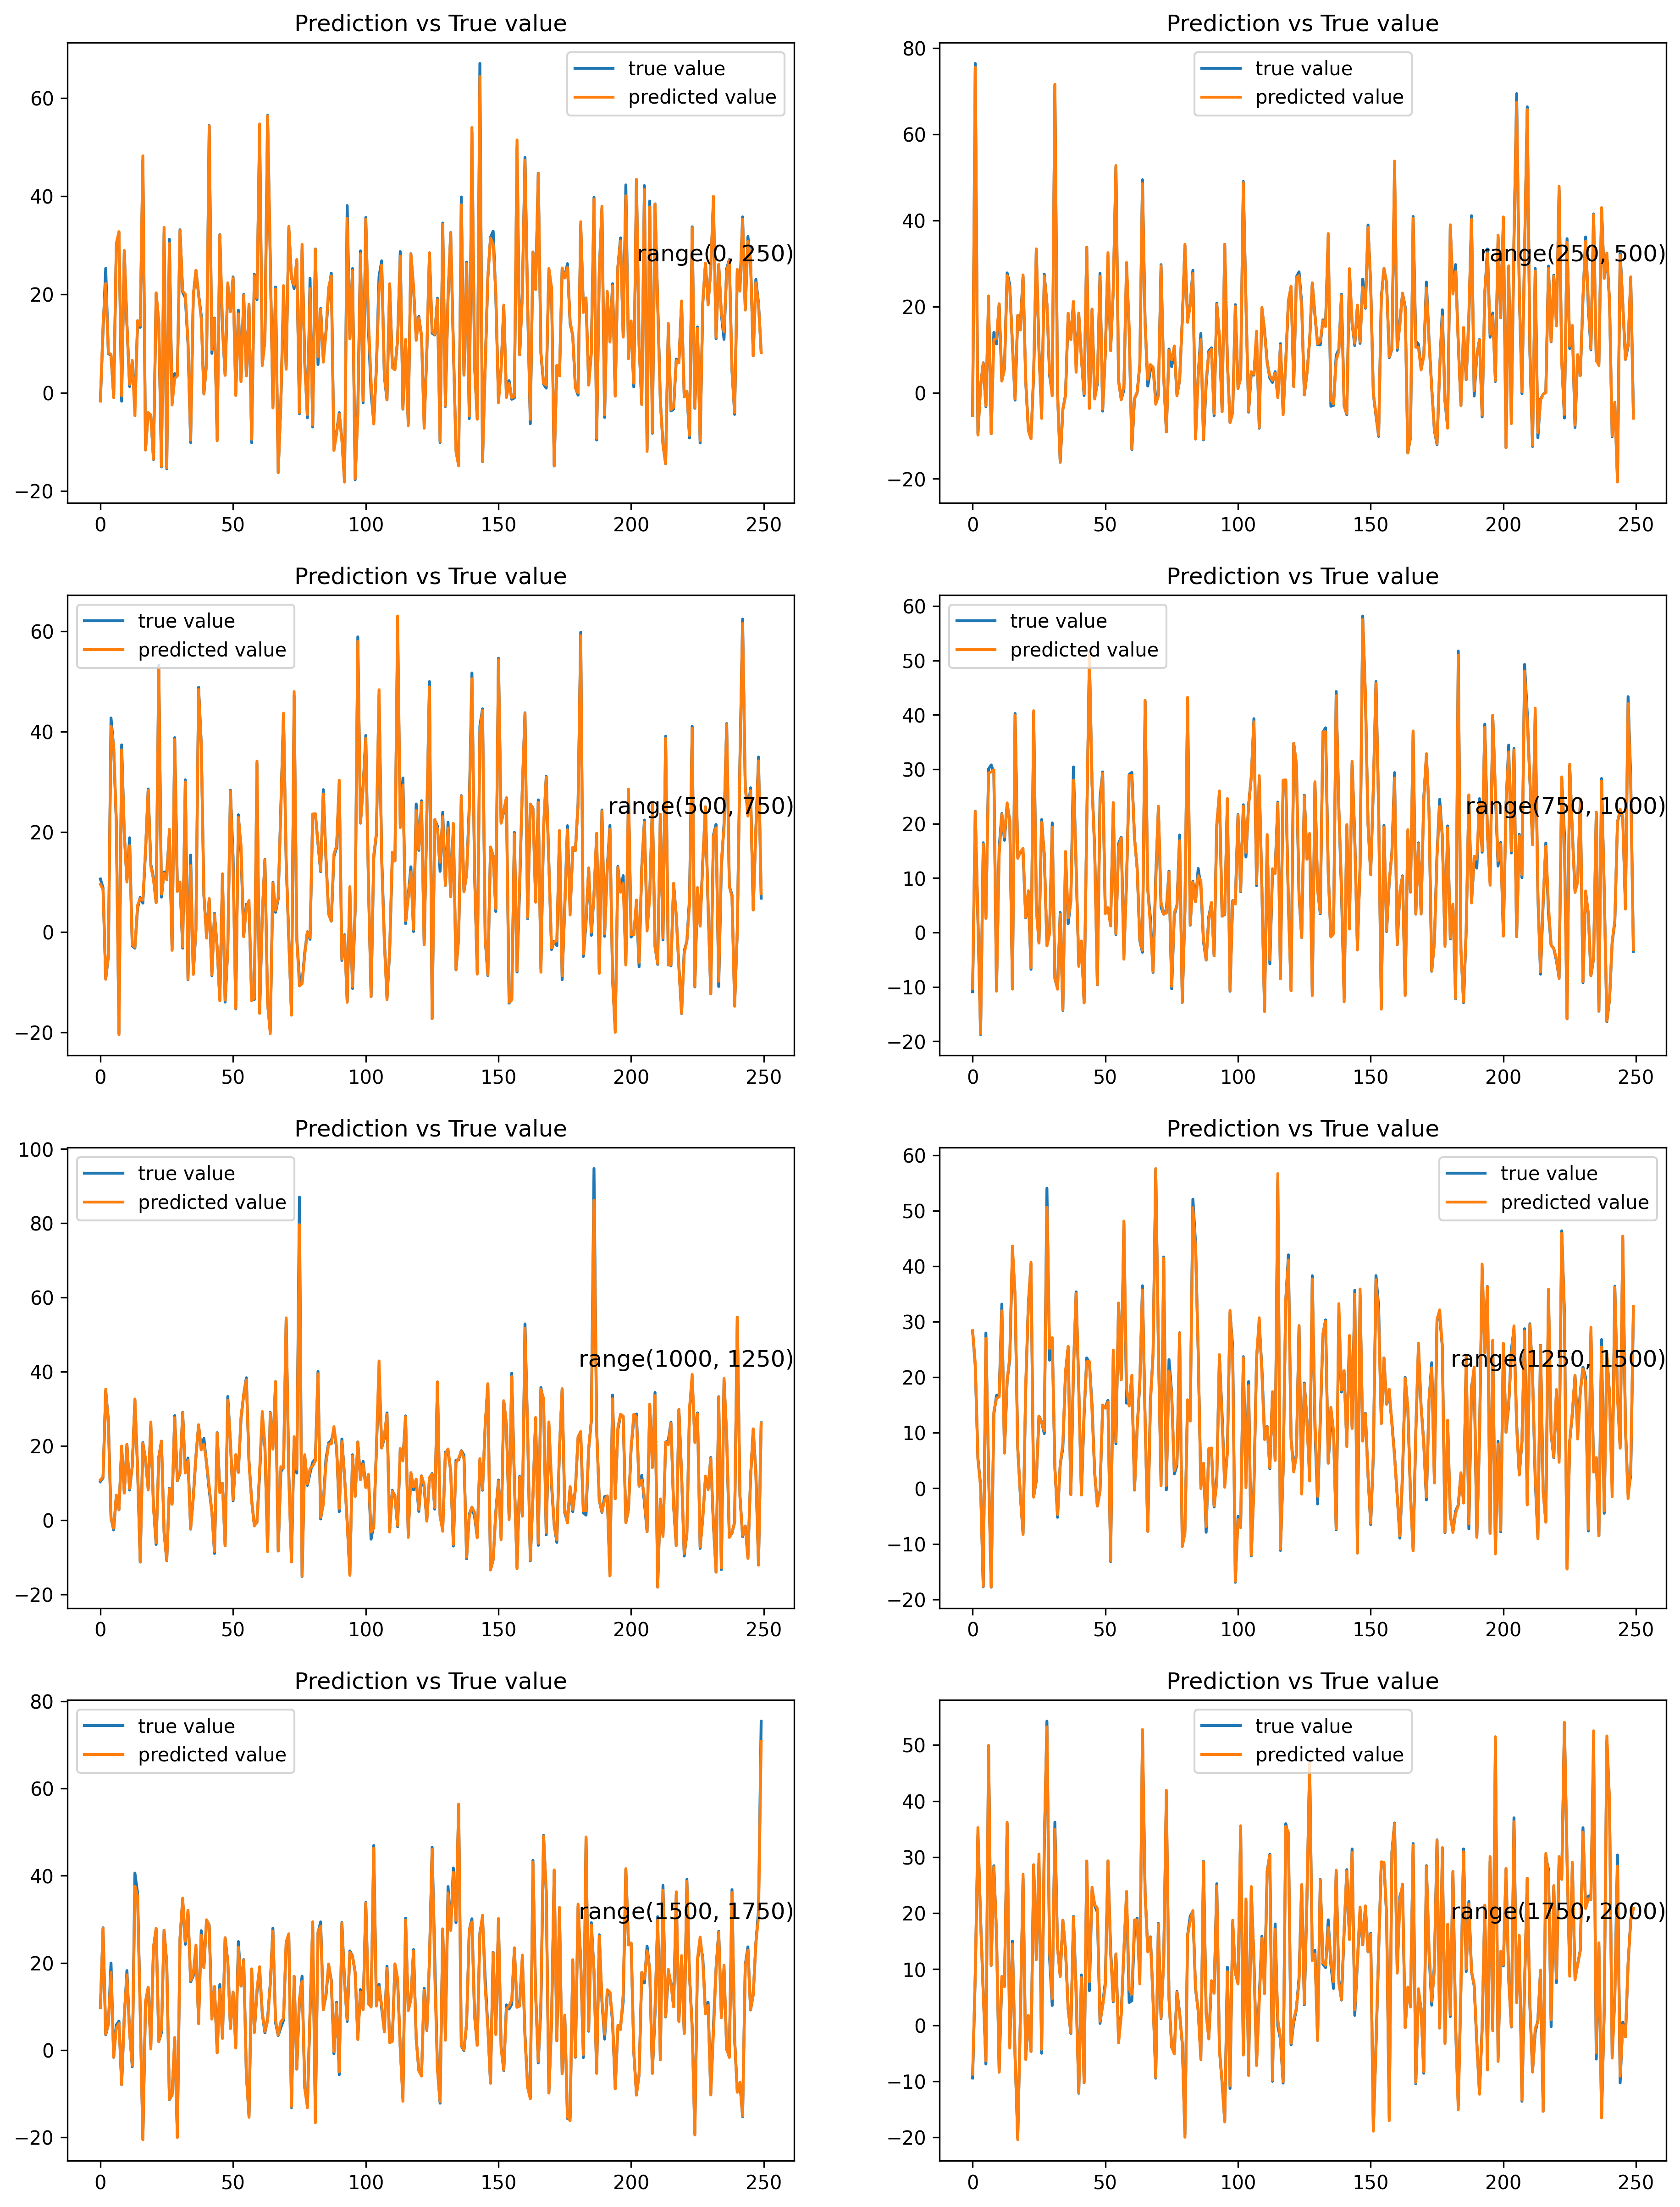

In [86]:
plt.figure(figsize=(15, 20), dpi=300)
for i in range(1, 9):
    plt.subplot(4, 2, i)
    plot_range = range(2000 // 8 * (i-1), 2000 // 8 * i)
    plt.plot(y_test.values[plot_range], label='true value')
    plt.plot(y_test_pred[plot_range], label='predicted value')
#     plt.scatter(y_test.values[plot_range], y_test_pred[plot_range])
    plt.title("Prediction vs True value")
    plt.title(plot_range, y=0.5, loc='right')
    plt.legend()
plt.show()